# Proyecto de Análisis de Reservas de Uber
## Introducción
Este proyecto analiza un conjunto de datos públicos de viajes de Uber.
El objetivo es comprender el comportamiento de las reservas, identificando viajes completados y cancelados, métodos de pago más utilizados, calificaciones de usuarios y conductores, así como la relación entre valor, distancia y características del viaje.
El trabajo se realizó en Python, utilizando librerías para la limpieza, exploración y visualización de los datos.

## Importación y carga de datos

Se cargaron los datos desde un archivo CSV con 150.000 registros y 21 columnas. Entre las variables se incluyen fecha, estado de la reserva, tipo de vehículo, ubicaciones de inicio y destino, valor del viaje, distancia recorrida, métodos de pago y calificaciones.

Se detectó la presencia de valores nulos en varias columnas, especialmente en variables relacionadas con cancelaciones, distancia, valor de viaje y calificaciones.

In [2]:
# Importación y carga de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# Cargar archivo CSV
df = pd.read_csv("data/uber_datos.csv")

# Vista inicial
df.head()

# se cargan los datos iniciales de Uber, que incluyen información de viajes, reservas, cancelaciones, calificaciones y métodos de pago.

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
# Información general
df.info()

# Valores nulos por columna
df.isnull().sum().sort_values(ascending=False).head(10)

# El dataset tiene 150.000 registros y 21 columnas. 
# Se observa gran cantidad de valores nulos en variables de cancelaciones, distancias, montos y calificaciones.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

Incomplete Rides Reason              141000
Incomplete Rides                     141000
Reason for cancelling by Customer    139500
Cancelled Rides by Customer          139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Driver Ratings                        57000
Customer Rating                       57000
Avg CTAT                              48000
Ride Distance                         48000
dtype: int64

## Limpieza de datos

In [4]:
# Conversión de fecha y horas 
# Se creó una columna combinada de fecha y hora (Datetime) para facilitar los análisis temporales. 

df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], errors="coerce")


In [5]:
# Eliminar comillas innecesarias en IDs
df["Booking ID"] = df["Booking ID"].str.replace('"', "")
df["Customer ID"] = df["Customer ID"].str.replace('"', "")

In [6]:
# Eliminación de duplicados 
df = df.drop_duplicates(subset="Booking ID", keep="first")

In [7]:
# Seleccionar columnas relevantes
cols_keep = [
    "Datetime",         # Fecha y hora combinadas
    "Booking Status",   # Estado de la reserva
    "Vehicle Type",     # Tipo de vehículo
    "Pickup Location",  # Ubicación de origen
    "Drop Location",    # Ubicación de destino
    "Booking Value",    # Valor de la reserva
    "Ride Distance",    # Distancia del viaje
    "Payment Method",   # Método de pago
    "Driver Ratings",   # Calificaciones del conductor
    "Customer Rating"   # Calificación del cliente
]

# Crear el DataFrame limpio
df_clean = df[cols_keep].copy()

# Mostrar información de forma más ordenada
from IPython.display import display, HTML

print(" Columnas seleccionadas exitosamente:")
print(f"- Número de columnas: {len(df_clean.columns)}")
print(f"- Número de filas: {len(df_clean)}")

# Mostrar columnas
print("\nColumnas en df_clean:")
display(pd.DataFrame(df_clean.columns, columns=["Columnas seleccionadas"]))

# Mostrar información básica
print("\nInformación del dataset limpio:")
display(df_clean.info())

# Mostrar primeras 5 filas como tabla bonita
print("\nVista previa de los primeros 5 registros:")
display(df_clean.head().style.set_properties(**{
    'background-color': '#f9f9f9',
    'border-color': 'black',
    'color': 'black'
}))


 Columnas seleccionadas exitosamente:
- Número de columnas: 10
- Número de filas: 148767

Columnas en df_clean:


,Columnas seleccionadas
0,Datetime
1,Booking Status
2,Vehicle Type
3,Pickup Location
4,Drop Location
5,Booking Value
6,Ride Distance
7,Payment Method
8,Driver Ratings
9,Customer Rating



Información del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 148767 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Datetime         148767 non-null  datetime64[ns]
 1   Booking Status   148767 non-null  object        
 2   Vehicle Type     148767 non-null  object        
 3   Pickup Location  148767 non-null  object        
 4   Drop Location    148767 non-null  object        
 5   Booking Value    101175 non-null  float64       
 6   Ride Distance    101175 non-null  float64       
 7   Payment Method   101175 non-null  object        
 8   Driver Ratings   92248 non-null   float64       
 9   Customer Rating  92248 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 12.5+ MB


None


Vista previa de los primeros 5 registros:


,Datetime,Booking Status,Vehicle Type,Pickup Location,Drop Location,Booking Value,Ride Distance,Payment Method,Driver Ratings,Customer Rating
0,2024-03-23 12:29:38,No Driver Found,eBike,Palam Vihar,Jhilmil,nan,nan,nan,nan,nan
1,2024-11-29 18:01:39,Incomplete,Go Sedan,Shastri Nagar,Gurgaon Sector 56,237.000000,5.730000,UPI,nan,nan
2,2024-08-23 08:56:10,Completed,Auto,Khandsa,Malviya Nagar,627.000000,13.580000,Debit Card,4.900000,4.900000
3,2024-10-21 17:17:25,Completed,Premier Sedan,Central Secretariat,Inderlok,416.000000,34.020000,UPI,4.600000,5.000000
4,2024-09-16 22:08:00,Completed,Bike,Ghitorni Village,Khan Market,737.000000,48.210000,UPI,4.100000,4.300000


## Análisis Exploratorio de Datos

In [8]:
# Conversión de numéricos y filtrado
cols_numeric = ["Booking Value", "Ride Distance", "Driver Ratings", "Customer Rating"]
df_clean[cols_numeric] = df_clean[cols_numeric].apply(pd.to_numeric, errors="coerce")

# Eliminar viajes sin monto o distancia
df_clean = df_clean.dropna(subset=["Booking Value", "Ride Distance"])

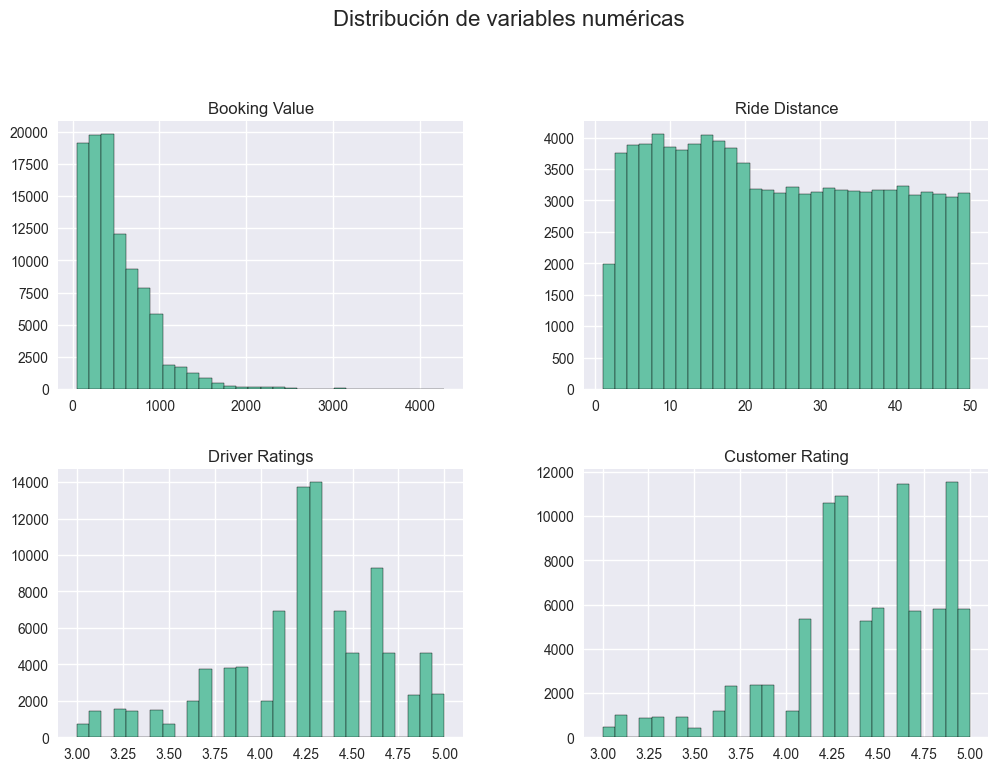

In [9]:
# Análisis Exploratorio de Datos (EDA)
# Distribución de variables numéricas
df_clean[cols_numeric].hist(figsize=(12,8), bins=30, edgecolor="black")
plt.suptitle("Distribución de variables numéricas", fontsize=16, y=1.02)
plt.show()

### El análisis de las variables numéricas permite entender mejor el comportamiento típico de los viajes: 

* Booking Value (valor de la reserva): La mayoría de los viajes tienen precios bajos, con una fuerte concentración en valores inferiores a 500. Existen algunos viajes con valores mucho más altos, que aparecen como casos poco frecuentes. Estos pueden corresponder a viajes largos, vehículos premium o a errores en los registros.

* Ride Distance (distancia recorrida): La distribución es más uniforme, aunque se observa una mayor concentración en viajes cortos (menos de 20 km). Al igual que en los valores de reserva, aparecen viajes largos poco comunes.

* Driver Ratings (calificación del conductor): La mayor parte de las calificaciones se concentra entre 4,0 y 5,0, lo que sugiere un alto nivel de satisfacción general con los conductores. Se destacan picos cercanos a 4,2 y 4,7.

* Customer Rating (calificación del cliente): Al igual que con los conductores, la mayoría de los clientes recibe calificaciones entre 4,0 y 5,0. La distribución es bastante simétrica y sugiere que los conductores valoran de manera positiva a la mayor parte de los pasajeros.

El viaje típico en este dataset es de bajo costo, corta distancia y recibe buenas calificaciones tanto del cliente como del conductor. Los valores extremos en precio y distancia son poco frecuentes, pero importantes de considerar como posibles viajes premium o anomalías.

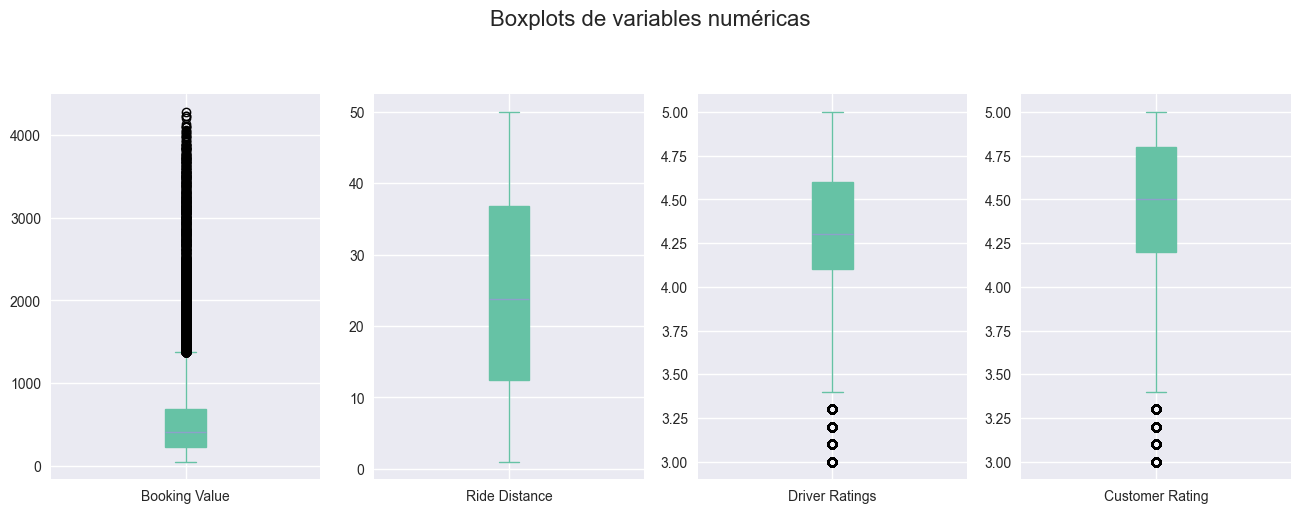

In [10]:
# Boxplots para detectar outliers
df_clean[cols_numeric].plot(kind="box", subplots=True, layout=(1,4),
                      sharey=False, figsize=(16,5), patch_artist=True)
plt.suptitle("Boxplots de variables numéricas", fontsize=16, y=1.05)
plt.show()

El análisis con boxplots permite identificar la dispersión de los datos y la presencia de valores atípicos:

* Booking Value (valor de la reserva): Se observa una gran cantidad de outliers hacia arriba. La mayoría de los viajes tiene valores bajos, pero existen viajes con precios mucho más altos. Estos outliers pueden corresponder a viajes de larga distancia, servicios premium o registros erróneos.

* Ride Distance (distancia recorrida): La mayoría de los viajes se concentran en distancias cortas a medias. Sin embargo, también aparecen valores extremos con recorridos mucho más largos.

* Driver Ratings (calificación del conductor): La distribución está centrada entre 4,0 y 5,0, lo que confirma una tendencia general a calificaciones positivas. No obstante, se identifican algunos outliers con puntuaciones muy bajas, que representan experiencias negativas poco frecuentes.

* Customer Rating (calificación del cliente): Presenta un patrón similar al de los conductores: la mayoría de las calificaciones son altas, aunque también aparecen outliers con puntajes bajos.

Los boxplots refuerzan que el viaje típico es de bajo costo y distancia moderada, con calificaciones altas. Los outliers, tanto en precios/distancias como en calificaciones bajas, son excepciones que merecen análisis adicional para identificar si corresponden a nichos específicos (viajes premium, ubicaciones particulares, usuarios problemáticos) o a datos erróneos.

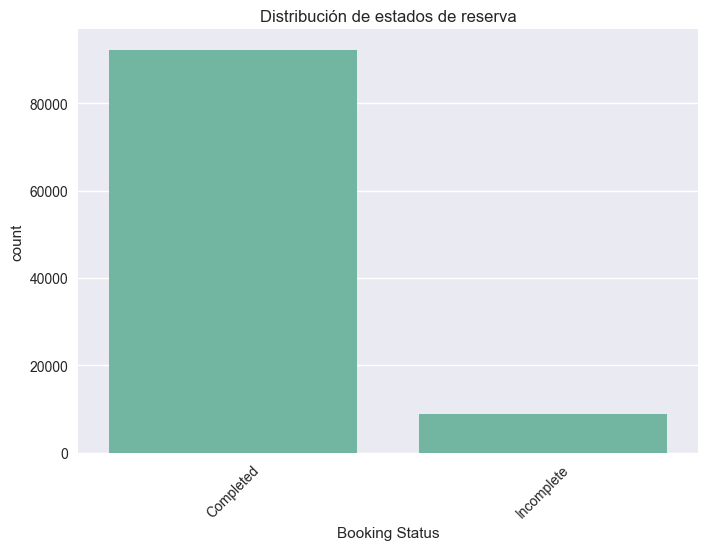

In [11]:
# Frecuencia de estados de reserva
sns.countplot(data=df_clean, x="Booking Status", order=df_clean["Booking Status"].value_counts().index)
plt.title("Distribución de estados de reserva")
plt.xticks(rotation=45)
plt.show()

La mayoría de los viajes se completan, aunque hay un porcentaje significativo de cancelaciones.

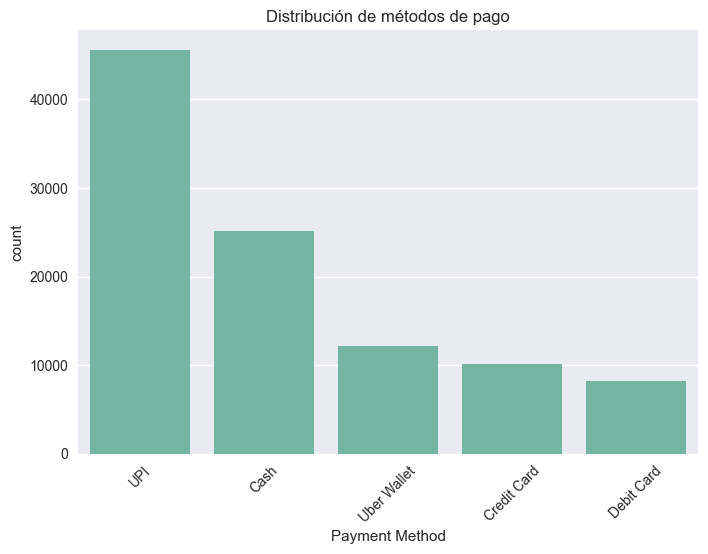

In [12]:
# Métodos de pago
sns.countplot(data=df_clean, x="Payment Method", order=df_clean["Payment Method"].value_counts().index)
plt.title("Distribución de métodos de pago")
plt.xticks(rotation=45)
plt.show()

UPI y efectivo son los métodos de pago más utilizados.

TOP 10 PICKUP LOCATIONS:
Pickup Location
Khandsa             660
Barakhamba Road     655
Kanhaiya Nagar      638
Madipur             635
Subhash Chowk       625
Badarpur            622
Dwarka Sector 21    616
Saket               615
Tilak Nagar         614
AIIMS               613
Name: count, dtype: int64

TOP 10 DROP LOCATIONS:
Drop Location
Ashram             647
Narsinghpur        628
Sultanpur          625
Madipur            625
Lajpat Nagar       625
Sarai Kale Khan    622
Cyber Hub          620
Preet Vihar        619
Dwarka Mor         616
Noida Extension    615
Name: count, dtype: int64


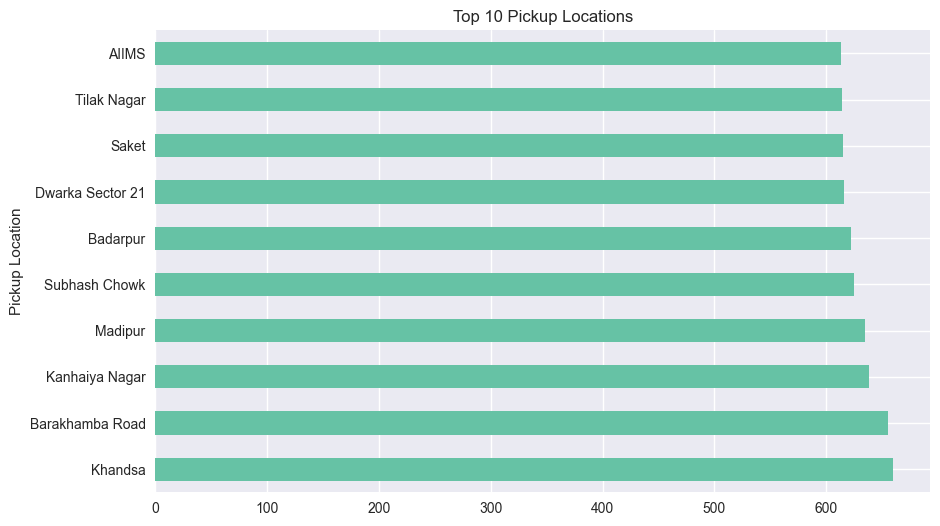

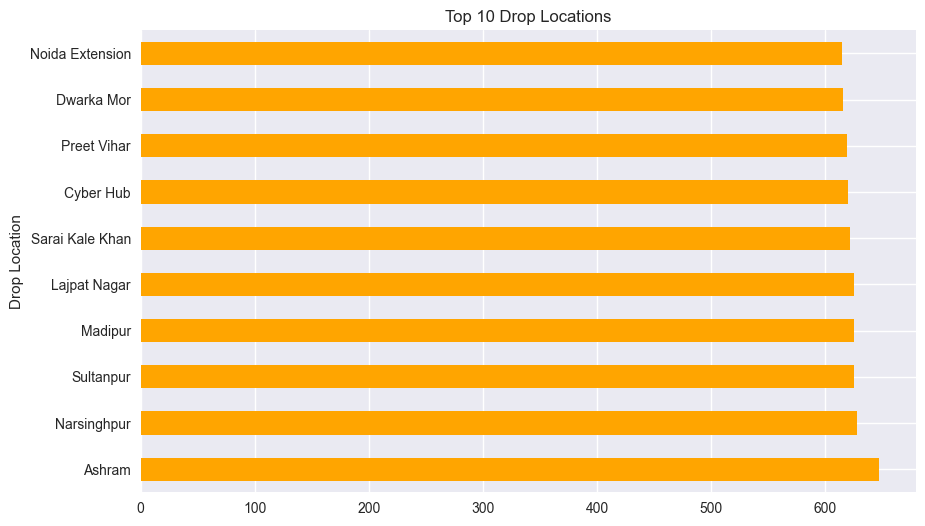

In [13]:
### 4.5 - Top 10 Lugares 
# Para Pickup Location
print("TOP 10 PICKUP LOCATIONS:")
pickup_top = df_clean["Pickup Location"].value_counts().head(10)
print(pickup_top)
print()

# Para Drop Location  
print("TOP 10 DROP LOCATIONS:")
drop_top = df_clean["Drop Location"].value_counts().head(10)
print(drop_top)

# Gráficos de barras horizontales
pickup_top.plot(kind='barh', title='Top 10 Pickup Locations', figsize=(10, 6))
plt.show()

drop_top.plot(kind='barh', title='Top 10 Drop Locations', figsize=(10, 6), color='orange')
plt.show()

Algunas zonas específicas concentran la mayoría de viajes, lo que muestra focos de alta demanda.

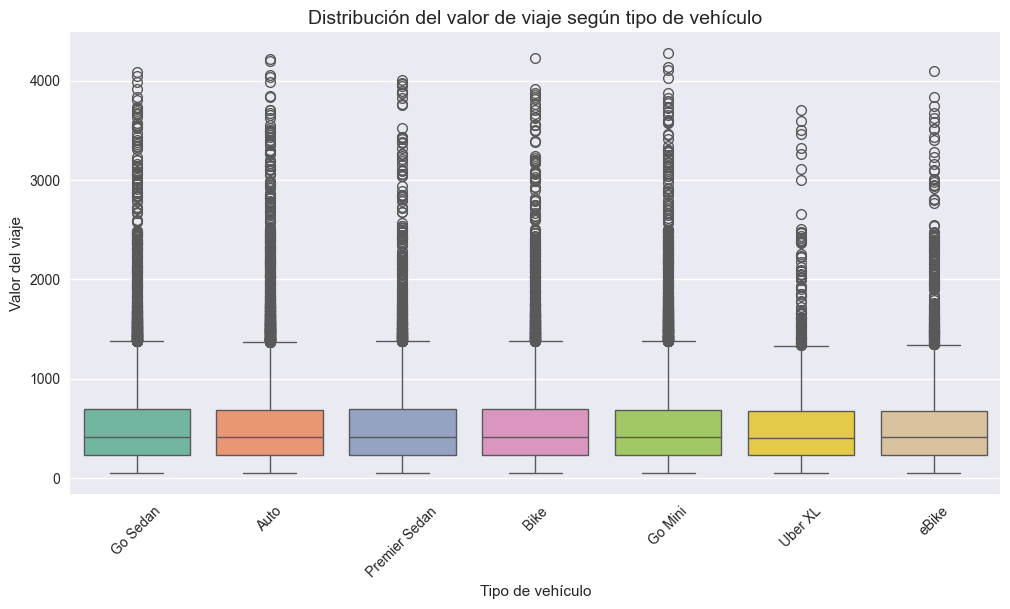

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_clean,
    x="Vehicle Type", 
    y="Booking Value",
    hue="Vehicle Type",    
    legend=False          
)
plt.title("Distribución del valor de viaje según tipo de vehículo", fontsize=14)
plt.xlabel("Tipo de vehículo")
plt.ylabel("Valor del viaje")
plt.xticks(rotation=45)
plt.show()


* Valores centrales: En todos los tipos de vehículo, la mediana del valor del viaje se ubica en un rango relativamente bajo, lo que indica que la mayoría de los viajes son económicos.

* Vehículos premium (Premier Sedan, Uber XL): Presentan valores de viaje más elevados en comparación con las opciones estándar, aunque todavía con un rango de precios similar en la mayoría de los casos.

* Vehículos más económicos (eBike, Bike, Auto, Go Mini): Tienen medianas y rangos de precios menores, lo que los posiciona como las opciones más accesibles.

* Outliers: En todos los tipos de vehículo aparecen muchos viajes con precios excepcionalmente altos. Estos pueden corresponder a trayectos largos, tarifas dinámicas en horarios de alta demanda o incluso a registros anómalos.

Aunque el costo de los viajes es mayor en los vehículos premium, la dispersión dentro de cada categoría es considerable. Esto refleja que factores como la distancia, la demanda y las condiciones del viaje tienen un peso importante en la determinación del precio, más allá del tipo de vehículo elegido.

## Conclusiones:

* Viaje típico: La mayoría de los viajes son de corta distancia, bajo costo y calificaciones altas (entre 4 y 5).

* Confiabilidad del servicio: La gran parte de las reservas se completan, lo que refleja un nivel de servicio confiable. Sin embargo, el volumen de cancelaciones justifica un análisis más profundo por ubicación, tipo de vehículo o método de pago.

* Preferencias de pago: UPI y efectivo son los métodos predominantes. Se observa un avance hacia la digitalización, aunque el pago en efectivo sigue siendo muy relevante.

* Zonas de demanda: Algunas ubicaciones concentran la mayoría de los viajes. Esto puede orientar estrategias para mejorar la asignación de conductores.

* Viajes atípicos: Se detectaron viajes con valores y distancias muy elevados, posiblemente asociados a servicios premium o a registros anómalos.

## Aprendizaje del proyecto:
* Aplicación de técnicas de limpieza y preparación de datos con problemas de calidad (nulos, duplicados, outliers).

* Uso de Python y librerías de visualización para el análisis exploratorio.

* Obtención de conclusiones útiles para el negocio: confiabilidad del servicio, preferencias de pago y focos de demanda.
